# IMPORTING REQUIRED LIBRARIES

In [2]:
"""
DATA MANIPULATİNG
"""
import numpy as np 
import pandas as pd
from sklearn.utils import shuffle

"""
NATURAL LANGUAGE PROCESSING
"""
import openai
import regex as re
import nltk 
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

"""
VISUALIZATION TOOLS
"""
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

"""
TIME
"""
import time

# Data Preprocessing

In [3]:
df = pd.read_csv('tweets_en.csv', usecols=['text','location', 'tweetcreatedts','tweetid'])
df

,tweetid,location,tweetcreatedts,text
0,1509681950042198030,Hawaii,2022-04-01 00:00:00.000000,⚡The Ukrainian Air Force would like to address...
1,1509681950151348229,NaN,2022-04-01 00:00:00.000000,Chernihiv oblast. Ukrainians welcome their lib...
2,1509681950683926556,NaN,2022-04-01 00:00:00.000000,America 🇺🇸 is preparing for something worse th...
3,1509681951116046336,International Web Zone,2022-04-01 00:00:00.000000,JUST IN: #Anonymous has hacked &amp; released ...
4,1509681951304990720,Hunter Account,2022-04-01 00:00:00.000000,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...
...,...,...,...,...
44416748,1509677720514433028,"North Logan, UT",2022-03-31 23:43:11.000000,"Amb. William Taylor, former U.S. Ambassador to..."
44416749,1509677722590605313,NaN,2022-03-31 23:43:12.000000,@lapatina_ @berehulak this just hurts my heart...
44416750,1509677723136020480,NaN,2022-03-31 23:43:12.000000,"@Abiy Ahmed, Eritrean dictator Isaias Afewerki..."
44416751,1509677724490641410,The America's,2022-03-31 23:43:12.000000,"#MARIUPOL—However, even at #Ilyich, #Ukraine|i..."


In [4]:
df = df[df.location.notnull()]
df

,tweetid,location,tweetcreatedts,text
0,1509681950042198030,Hawaii,2022-04-01 00:00:00.000000,⚡The Ukrainian Air Force would like to address...
3,1509681951116046336,International Web Zone,2022-04-01 00:00:00.000000,JUST IN: #Anonymous has hacked &amp; released ...
4,1509681951304990720,Hunter Account,2022-04-01 00:00:00.000000,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...
6,1509681952978210849,Southernmost Southern CA,2022-04-01 00:00:00.000000,&amp;quot;How we were waiting for you!&amp;quo...
7,1509681953053843466,India,2022-04-01 00:00:00.000000,India's purchase of discounted #Russian crude ...
...,...,...,...,...
44416744,1509677715972145157,Bayern,2022-03-31 23:43:10.000000,I'll be joining @Lawrence tonight on @TheLastW...
44416745,1509677716592803853,"Omaha, NE",2022-03-31 23:43:10.000000,"We’ve lost already thousands of people killed,..."
44416747,1509677720388931589,"Canterbury Region, Aotearoa",2022-03-31 23:43:11.000000,⚡The Ukrainian Air Force would like to address...
44416748,1509677720514433028,"North Logan, UT",2022-03-31 23:43:11.000000,"Amb. William Taylor, former U.S. Ambassador to..."


In [64]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))

C:\Users\hp\AppData\Local\Temp\ipykernel_7408\1636031861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(lambda x: len(x.split()))


In [65]:
df = df[df['text_len']>1]

Text(0.5, 1.0, 'Length of text')

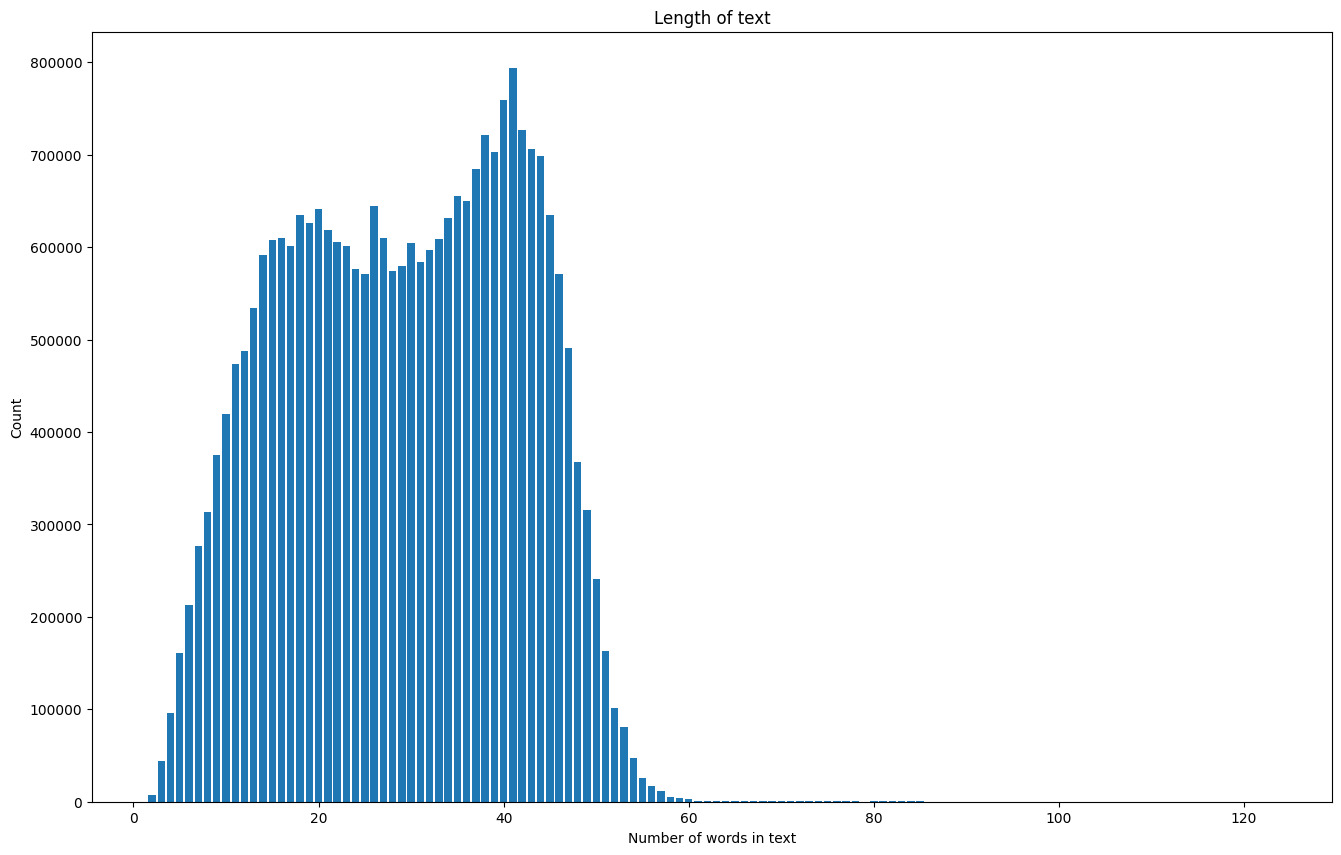

In [66]:
plt.figure(figsize=(16,10))
plt.bar(df.text_len.value_counts().sort_index().index, df.text_len.value_counts().sort_index().values)
plt.xlabel('Number of words in text')
plt.ylabel('Count')
plt.title('Length of text')

In [67]:
df.shape

(26311614, 5)

In [5]:
df['month'] = df['tweetcreatedts'].apply(lambda d: str(d)[:7])
df

C:\Users\hp\AppData\Local\Temp\ipykernel_20056\1982862171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['tweetcreatedts'].apply(lambda d: str(d)[:7])


,tweetid,location,tweetcreatedts,text,month
0,1509681950042198030,Hawaii,2022-04-01 00:00:00.000000,⚡The Ukrainian Air Force would like to address...,2022-04
3,1509681951116046336,International Web Zone,2022-04-01 00:00:00.000000,JUST IN: #Anonymous has hacked &amp; released ...,2022-04
4,1509681951304990720,Hunter Account,2022-04-01 00:00:00.000000,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,2022-04
6,1509681952978210849,Southernmost Southern CA,2022-04-01 00:00:00.000000,&amp;quot;How we were waiting for you!&amp;quo...,2022-04
7,1509681953053843466,India,2022-04-01 00:00:00.000000,India's purchase of discounted #Russian crude ...,2022-04
...,...,...,...,...,...
44416744,1509677715972145157,Bayern,2022-03-31 23:43:10.000000,I'll be joining @Lawrence tonight on @TheLastW...,2022-03
44416745,1509677716592803853,"Omaha, NE",2022-03-31 23:43:10.000000,"We’ve lost already thousands of people killed,...",2022-03
44416747,1509677720388931589,"Canterbury Region, Aotearoa",2022-03-31 23:43:11.000000,⚡The Ukrainian Air Force would like to address...,2022-03
44416748,1509677720514433028,"North Logan, UT",2022-03-31 23:43:11.000000,"Amb. William Taylor, former U.S. Ambassador to...",2022-03


# grouping locations

In [6]:
res = df[['location']].groupby(['location']).apply(lambda g: pd.Series([len(g)]))
res

,0
location,
China,5
\t,49
\t\t— (+63) • 🔞 • s/her \n\t\t— ot7♡ | 211024 JK bu: @softforjeon_ \n\t\t— rcbyf • sb to unf!,1
"\t San Francisco, CA",5
\t.JRD07.,1
...,...
🫶🏻 🫰,1
🫶🏻@caspianspook🫶🏻,1
🫶🏽,1


In [7]:
#res['sum'] = sum_list
res = res[res[0]>11000]

location_list = list(res.sort_values(0, ascending=False).index)
location_list

['United States',
 'Ukraine',
 'USA',
 'India',
 'Україна',
 'London',
 'London, England',
 'Canada',
 'United Kingdom',
 'Washington, DC',
 'Earth',
 'UK',
 'England, United Kingdom',
 'Украина',
 'Europe',
 'California, USA',
 'World',
 'Germany',
 'Los Angeles, CA',
 'Florida, USA',
 'Australia',
 'Kyiv, Ukraine',
 'New York, NY',
 'New York, USA',
 'Planet Earth',
 'Global',
 'Kyiv',
 'Colorado, USA',
 'Texas, USA',
 'France',
 'New Delhi, India',
 'Toronto, Ontario',
 'Deutschland',
 'Houston, TX',
 'Indonesia',
 'Paris, France',
 'Everywhere',
 'Chicago, IL',
 'Worldwide',
 'New York',
 'Brussels, Belgium',
 'The Netherlands',
 'Ireland',
 'Sweden',
 'Austin, TX',
 'Internet',
 'Polska',
 'Finland',
 'Berlin, Germany',
 'London, UK',
 'Pakistan',
 'Mumbai, India',
 'Brussels',
 'Florida',
 'Chennai, India',
 'Hong Kong',
 'Berlin',
 'Italia',
 'Las Vegas, NV',
 'Toronto',
 'Texas',
 'Libya',
 'Yes',
 'England',
 'Warszawa, Polska',
 'South Africa',
 'Seattle, WA',
 'Lagos, Nigeri

In [8]:
usa_list = []
for i in location_list:
    if re.findall('USA|America|Lost in the Minnesota North Woods|Colorado|San Francisco|, [A-Z]{2}|New Jersey|Ohio|United States|us|NYC|New York|California|Florida|Los Angeles|Texas|Chicago|Virginia|US|Washington', i):
        #print(i)
        usa_list.append(i)
usa_list.remove('London, UK')

In [9]:
china_list = []
for i in location_list:
    if re.findall('china', i.lower()):
        china_list.append(i)

In [10]:
uk_list = []
for i in location_list:
    if re.findall('UK|United Kingdom|London|England|Ireland|Scotland|British|Dublin|Ireland', i):
        print(i)
        uk_list.append(i)

London
London, England
United Kingdom
UK
England, United Kingdom
Ireland
London, UK
England
Scotland, United Kingdom
Scotland
Vancouver, British Columbia
Dublin City, Ireland
South East, England
Manchester, England
Dublin, Ireland
Edinburgh, Scotland
Glasgow, Scotland
London, United Kingdom
The North of England
Dublin
Cork, Ireland
South West, England
British Columbia, Canada


In [11]:
france_list = []
for i in location_list:
    if re.findall('france|paris', i.lower()):
        print(i)
        france_list.append(i)

France
Paris, France
Paris


In [12]:
ua_list = []
for i in location_list:
    if re.findall('ukrain|україна|ua |украина|kyiv|київ|киев', i.lower()):
        print(i)
        ua_list.append(i)

Ukraine
Україна
Украина
Kyiv, Ukraine
Kyiv
Ukraine 
Ukraine, Kyiv
Київ
Хай живе Україна
Киев
Lviv, Ukraine
Kyiv 🇺🇦


In [13]:
gr_list = []
for i in location_list:
    if re.findall('germany|berlin|deutschland', i.lower()):
        print(i)
        gr_list.append(i)

Germany
Deutschland
Berlin, Germany
Berlin
Berlin, Deutschland
Lübeck, Germany
Hamburg, Deutschland
Bayern, Deutschland


In [14]:
be_list = []
for i in location_list:
    if re.findall('belgium|brussels', i.lower()):
        print(i)
        be_list.append(i)

Brussels, Belgium
Brussels
Belgium


In [15]:
ind_list = []
for i in location_list:
    if re.findall('india|delhi|mumbai', i.lower()):
        print(i)
        ind_list.append(i)

India
New Delhi, India
Mumbai, India
Chennai, India
New Delhi
Hyderabad, India
Bengaluru, India
Kolkata, India
Mumbai


In [16]:
ca_list = []
for i in location_list:
    if re.findall('canada|toronto|québec|ottawa|alberta|seattle|montreal', i.lower()):
        print(i)
        ca_list.append(i)

Canada
Toronto, Ontario
Toronto
Seattle, WA
Toronto, Canada
Ontario, Canada
Ottawa, Ontario
Montréal, Québec
Calgary, Alberta
Québec, Canada
Toronto, Ontario, Canada
Alberta, Canada
Montreal
Edmonton, Alberta
British Columbia, Canada
Seattle


In [17]:
it_list = []
for i in location_list:
    if re.findall('ital|milano', i.lower()):
        print(i)
        it_list.append(i)

Italia
Italy
Milano, Lombardia


In [18]:
po_list = []
for i in location_list:
    if re.findall('pol', i.lower()):
        print(i)
        po_list.append(i)

Polska
Warszawa, Polska
Poland
Warsaw, Poland
Minneapolis, MN


In [19]:
ne_list = []
for i in location_list:
    if re.findall('neth|ned|amster', i.lower()):
        print(i)
        ne_list.append(i)

The Netherlands
Nederland
Netherlands
Amsterdam
Amsterdam, The Netherlands


In [20]:
pa_list = []
for i in location_list:
    if re.findall('pakistan', i.lower()):
        print(i)
        pa_list.append(i)

Pakistan
Karachi, Pakistan
Islamabad, Pakistan
Lahore, Pakistan


In [21]:
other_list = []
for i in location_list:
    if re.findall('world|europe|internet|earth|yes|global|everywhere|doghouse|1,new church st tetbury gl88ds|mars|metaverse|eu', i.lower()):
        print(i)
        other_list.append(i)
other_list.remove('Berlin, Deutschland')
other_list.remove('Hamburg, Deutschland')
other_list.remove('Bayern, Deutschland')

Earth
Europe
World
Planet Earth
Global
Deutschland
Everywhere
Worldwide
Internet
Yes
Berlin, Deutschland
Doghouse
EU
1,New church st tetbury Gl88DS
Metaverse
Citizen of The World
The World
Mars
Hamburg, Deutschland
planet earth
worldwide
Bayern, Deutschland


In [22]:
nig_list = []
for i in location_list:
    if re.findall('niger', i.lower()):
        print(i)
        nig_list.append(i)

Lagos, Nigeria
Nigeria


In [23]:
afr_list = []
for i in location_list:
    if re.findall('afr', i.lower()):
        print(i)
        afr_list.append(i)

South Africa
Johannesburg, South Africa
Cape Town, South Africa


In [24]:
fin_list = []
for i in location_list:
    if re.findall('fin|helsinki|suomi', i.lower()):
        print(i)
        fin_list.append(i)

Finland
Helsinki, Finland
Suomi
Helsinki, Suomi


In [25]:
swe_list = []
for i in location_list:
    if re.findall('sverige|sweden|stockholm', i.lower()):
        print(i)
        swe_list.append(i)

Sweden
Sverige
Stockholm, Sverige
Stockholm, Sweden
Stockholm


In [26]:
spa_list = []
for i in location_list:
    if re.findall('spa|madr', i.lower()):
        print(i)
        spa_list.append(i)

Spain
España
Madrid


In [27]:
au_list = []
for i in location_list:
    if re.findall('sydney|ustralia|melbourn', i.lower()):
        print(i)
        au_list.append(i)

Australia
Melbourne, Victoria
Sydney, New South Wales
Perth, Western Australia
Sydney, Australia
Sydney


In [28]:
ja_list = []
for i in location_list:
    if re.findall('japan|日本|日本 東京', i.lower()):
        print(i)
        ja_list.append(i)

Japan
日本
JAPAN
日本 東京
Tokyo, Japan


In [29]:
ro_list = []
for i in location_list:
    if re.findall('roma', i.lower()):
        print(i)
        ro_list.append(i)

Romania
Bucharest, Romania


In [30]:
cz_list = []
for i in location_list:
    if re.findall('prague|czech|esk', i.lower()):
        print(i)
        cz_list.append(i)

Česká republika
Czech Republic
Prague, Czech Republic


In [31]:
du_list = []
for i in location_list:
    if re.findall('dubai', i.lower()):
        print(i)
        du_list.append(i)

Dubai, United Arab Emirates
Dubai


In [32]:
gre_list = []
for i in location_list:
    if re.findall('gre', i.lower()):
        print(i)
        gre_list.append(i)

Athens, Greece
Greece


In [33]:
tur_list = []
for i in location_list:
    if re.findall('tur|tü', i.lower()):
        print(i)
        tur_list.append(i)

İstanbul, Türkiye
Istanbul, Turkey


In [34]:
swi_list = []
for i in location_list:
    if re.findall('swi|zurich', i.lower()):
        print(i)
        swi_list.append(i)

Switzerland
Geneva, Switzerland
Zurich


In [35]:
nor_list = []
for i in location_list:
    if re.findall('norw|norge', i.lower()):
        print(i)
        nor_list.append(i)

Norway
Oslo, Norway
Norge


In [36]:
por_list = []
for i in location_list:
    if re.findall('portu', i.lower()):
        print(i)
        por_list.append(i)

Portugal
Lisboa, Portugal


In [37]:
mal_list = []
for i in location_list:
    if re.findall('mal', i.lower()):
        print(i)
        mal_list.append(i)

Kuala Lumpur, Malaysia
Malaysia


In [38]:
lat_list = []
for i in location_list:
    if re.findall('latv|riga', i.lower()):
        print(i)
        lat_list.append(i)

Riga
Riga, Latvia
Latvia


In [39]:
lists = {
    'USA': usa_list,
    'Ukraine': ua_list,
    'France': france_list,
    'UK': uk_list,
    'Germany': gr_list,
    'India': ind_list,
    'Belgium': be_list,
    'Canada': ca_list,
    'Italy': it_list,
    'Poland': po_list,
    'Netherland': ne_list,
    'Pakistan': pa_list,
    'Other': other_list,
    'Nigeria': nig_list,
    'South Africa': afr_list,
    'Finland': fin_list,
    'Sweden': swe_list,
    'Spain': spa_list,
    'Australia': au_list,
    'Japan': ja_list,
    'Romania': ro_list,
    'Czech': cz_list,
    'Dubai': du_list,
    'Greece': gre_list,
    'Turkey': tur_list,
    'Swidtherland': swi_list,
    'Norway': nor_list,
    'Portugal': por_list,
    'Malaysia': mal_list,
    'Latvia': lat_list
}

In [41]:
from tqdm.notebook import tqdm
tmp = df[df['location'].isin(location_list)][['location','text','month']]
for li in tqdm(lists.items()):
    for val in tqdm(li[1]):
        tmp['location'].replace({val:li[0]}, inplace=True)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [42]:
interest_zone = list(lists.keys()) + ['Brasil',
 'Denmark',
 'Dhaka, Bangladesh','Estonia',
 'Georgia',
 'Hong Kong',
 'Iceland',
 'Indonesia',
 'Israel',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Nairobi, Kenya',
 'New Zealand','Republic of the Philippines','Singapore','Sri Lanka',
 'Taiwan',
 'Tallinn, Estonia',
 'Venezuela']
interest_zone.remove('Ukraine')
interest_zone.remove('Other')

In [43]:
tmp

,location,text,month
7,India,India's purchase of discounted #Russian crude ...,2022-04
10,Dubai,#Russia’s President Vladimir #Putin says he ha...,2022-04
11,Canada,Sad to read of the #RussianArmy invading of #C...,2022-04
13,UK,The #Anonymous collective has sent 7.000.000 a...,2022-04
16,USA,Read: https://t.co/kzxUuS6Z4d\n.\n.\n.\n.\n.\n...,2022-04
...,...,...,...
44416712,UK,This is the Belarusian battalion named after K...,2022-03
44416721,USA,IMAGE of a captured Russian ZSU-23 Shilka Anti...,2022-03
44416738,USA,@cbain00 @663Renegade @BeatriceLacy @szentandr...,2022-03
44416739,UK,The biggest advantage for 🇺🇦 now with the 🇷🇺 r...,2022-03


In [44]:
tmp = tmp[tmp.location.isin(interest_zone)]

In [ ]:
tmp.to_csv('sent_classification.csv', index=False)

In [1]:
import numpy as np 
import pandas as pd
import openai
from tqdm import tqdm

In [102]:
tmp = pd.read_csv('sent_classification.csv')
tmp

,location,text,month
0,India,India's purchase of discounted #Russian crude ...,2022-04
1,Dubai,#Russia’s President Vladimir #Putin says he ha...,2022-04
2,Canada,Sad to read of the #RussianArmy invading of #C...,2022-04
3,UK,The #Anonymous collective has sent 7.000.000 a...,2022-04
4,USA,Read: https://t.co/kzxUuS6Z4d\n.\n.\n.\n.\n.\n...,2022-04
...,...,...,...
7998869,UK,This is the Belarusian battalion named after K...,2022-03
7998870,USA,IMAGE of a captured Russian ZSU-23 Shilka Anti...,2022-03
7998871,USA,@cbain00 @663Renegade @BeatriceLacy @szentandr...,2022-03
7998872,UK,The biggest advantage for 🇺🇦 now with the 🇷🇺 r...,2022-03


In [103]:
import regex as re
tmp['clean_text'] = tmp['text'].apply(lambda x: re.sub('\n|https:[/a-zA-Z0-9.]+|&[a-zA-Z;]+|@[a-zA-Z]+','',x))

In [104]:
tmp = tmp[tmp.month.isin(['2023-05','2023-06'])]

In [105]:
tmp['prediction'] = tmp.clean_text.replace(mySentiment)

C:\Users\hp\AppData\Local\Temp\ipykernel_13948\1379583796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['prediction'] = tmp.clean_text.replace(mySentiment)


In [106]:
tmp

,location,text,month,clean_text,prediction
6017003,Libya,Videos Appear to Show Ukrainian Troops Shootin...,2023-05,Videos Appear to Show Ukrainian Troops Shootin...,Negative
6017004,USA,Today (apr 25 2023) Ukrainian forces use HIMAR...,2023-05,Today (apr 25 2023) Ukrainian forces use HIMAR...,Positive
6017005,USA,Sergei is a hero.\n\nDuring a battle in #Bakhm...,2023-05,"Sergei is a hero.During a battle in #Bakhmut, ...",Positive
6017006,Canada,Sergei is a hero.\n\nDuring a battle in #Bakhm...,2023-05,"Sergei is a hero.During a battle in #Bakhmut, ...",Positive
6017007,USA,Sergei is a hero.\n\nDuring a battle in #Bakhm...,2023-05,"Sergei is a hero.During a battle in #Bakhmut, ...",Positive
...,...,...,...,...,...
6178027,USA,Don't just get mad. Get busy.\n1-Donate https:...,2023-06,Don't just get mad. Get busy.1-Donate 2-Shop ...,Positive
6178028,Germany,7 marines of the 38th brigade of the Armed For...,2023-06,7 marines of the 38th brigade of the Armed For...,Neutral
6178029,USA,"In #France, the government has uncovered a maj...",2023-06,"In #France, the government has uncovered a maj...",Negative
6178030,Italy,💔Last day of the school year in a Ukrainian vi...,2023-06,💔Last day of the school year in a Ukrainian vi...,Positive


# LLM Labling

In [5]:
tmp.location.value_counts()

USA                            22609
UK                              9229
India                           4333
Libya                           4287
Canada                          2718
Germany                         1988
France                          1293
Netherland                      1191
Indonesia                        892
South Africa                     856
Sweden                           776
Pakistan                         685
Poland                           663
Italy                            583
Norway                           579
Finland                          561
Nigeria                          502
Dubai                            481
Swidtherland                     466
Turkey                           367
Latvia                           348
Japan                            325
Australia                        311
Portugal                         304
Israel                           293
Romania                          281
Czech                            239
D

In [6]:
mySentiment={}

In [1]:
import openai

openai.api_key = 'YOUR_API_KEY'


def get_completion(prompt):
    response = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": """You must classify input on 3 classes: Positive, Neutral, Negative.
                Positive - Text aimed for favour of Ukraine, end of the war, support of Ukraine, or somehow belittles russia, that is negative in its direction. Success of Ukraine good news for Ukraine and Ukrainians aid for Ukraine. #UkraineWillWin, #StandWithUkraine #StopPutin,#RussiaIsANaziState and #StopWar topics, and so on.
                Negative - Is opposite for Positive class and good fo russia.
                If Ukraine win fight, kill or bombing russian forces, vehicle or airtransport it`s good news."""},
        {"role": "user", "content": f"{prompt}"}],
    max_tokens=1)
    return response['choices'][0]['message']['content']
    
for message in tqdm(tmp.clean_text.values[len(mySentiment):]):
            prompt = f"""{message}"""
            mySentiment[message] = get_completion(prompt)

NameError: name 'tqdm' is not defined

In [16]:
mySentiment

{'Videos Appear to Show Ukrainian Troops Shooting Surrendering Russians | WSJ #UkraineRussianWar #UkraineWillWin #Luhansk #Donetsk #Bakhmut ': 'Negative',
 'Today (apr 25 2023) Ukrainian forces use HIMARS missiles destroy 1,400 Russian tanks since war began #Canada #Germany #Bakhmut #Kyiv #Ukraine ': 'Positive',
 'Sergei is a hero.During a battle in #Bakhmut, he dragged 9 wounded men to safety, applied 3 tourniquets, saved a dying soldier AND was firing his rifle in combat.Sergei was trained by Sons of Liberty International () trainer Jason.#UkraineWillWin #Ukraine #NAFO ': 'Positive',
 "🚨 #Bakhmut may very well end up being the catalyst for a Russian civil war.1) Putin has ordered that Bakhmut must be taken by May 8th, in time for the Soviet Victory Day parade on May 9th. He has threatened Shoigu and others with dire consequences.2) Prigozhin has Putin's…  ": 'Positive',
 'Horrible (apr 27 2023) Ukrainian use Javelin missiles destroy Ka-52 helicopters in Russian air base #Canada #Germ

In [91]:
openai.api_key = "YOUR_API_KEY"
import time
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role":"system", "content":"""You must classify input on 3 classes: Positive, Neutral, Negative.
                Positive - Text aimed for favour of Ukraine, end of the war, support of Ukraine, or somehow belittles russia, that is negative in its direction. Success of Ukraine good news for Ukraine and Ukrainians aid for Ukraine. #UkraineWillWin, #StandWithUkraine #StopPutin,#RussiaIsANaziState and #StopWar topics, and so on.
                Negative - Is opposite to Positive class and good for russia.
                If Ukraine win fight, kill or bombing russian forces, soldiers, vehicle or airtransport with weapon, dron or technic it`s Positive"""},
                {"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
            model=model,
            messages=messages,
            timeout=7,
            request_timeout=7,
            max_tokens=1)
    return response.choices[0].message["content"]
    
def useGPT():
    try:
        for message in tqdm(tmp.clean_text.values):
                prompt = f"""{message}"""
                mySentiment[message] = get_completion(prompt)
    except KeyboardInterrupt:
        return 'Done'
    
    except Exception:
        useGPT()
        

In [92]:
useGPT()

Exception ignored in: <function tqdm.__del__ at 0x000001E533BA1940>
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1271, in close
    pos = abs(self.pos)
              ^^^^^^^^
AttributeError: 'tqdm' object has no attribute 'pos'
Exception ignored in: <function tqdm.__del__ at 0x000001E533BA1940>
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1274, in close
    if self.last_print_t < self.start_t + self.delay:
       ^^^^^^^^^^^^^^^^^
AttributeError: 'tqdm' object has no attribute 'last_print_t'
Exception ignored in: <function tqdm.__del__ at 0x000001E533BA1940>

In [94]:
len(mySentiment),mySentiment

(59470,
 {'Videos Appear to Show Ukrainian Troops Shooting Surrendering Russians | WSJ #UkraineRussianWar #UkraineWillWin #Luhansk #Donetsk #Bakhmut ': 'Negative',
  'Today (apr 25 2023) Ukrainian forces use HIMARS missiles destroy 1,400 Russian tanks since war began #Canada #Germany #Bakhmut #Kyiv #Ukraine ': 'Positive',
  'Sergei is a hero.During a battle in #Bakhmut, he dragged 9 wounded men to safety, applied 3 tourniquets, saved a dying soldier AND was firing his rifle in combat.Sergei was trained by Sons of Liberty International () trainer Jason.#UkraineWillWin #Ukraine #NAFO ': 'Positive',
  "🚨 #Bakhmut may very well end up being the catalyst for a Russian civil war.1) Putin has ordered that Bakhmut must be taken by May 8th, in time for the Soviet Victory Day parade on May 9th. He has threatened Shoigu and others with dire consequences.2) Prigozhin has Putin's…  ": 'Positive',
  'Horrible (apr 27 2023) Ukrainian use Javelin missiles destroy Ka-52 helicopters in Russian air base 

In [95]:
res = pd.DataFrame(index=[i for i in range(len(mySentiment))], columns=['text','pred'])
res['text'] = mySentiment.keys()
res['pred'] = mySentiment.values()
res

,text,pred
0,Videos Appear to Show Ukrainian Troops Shootin...,Negative
1,Today (apr 25 2023) Ukrainian forces use HIMAR...,Positive
2,"Sergei is a hero.During a battle in #Bakhmut, ...",Positive
3,🚨 #Bakhmut may very well end up being the cata...,Positive
4,Horrible (apr 27 2023) Ukrainian use Javelin m...,Negative
...,...,...
59465,Putin Speaks About Ukraine War / Belarus Gets ...,Neutral
59466,🇺🇦 Glory to Ukraine!!#ukraine #ukrainian #russ...,Positive
59467,#GTGraphic: The CIA says it has warned Ukraine...,Positive
59468,7 marines of the 38th brigade of the Armed For...,Neutral


In [98]:
mySentiment

{'Videos Appear to Show Ukrainian Troops Shooting Surrendering Russians | WSJ #UkraineRussianWar #UkraineWillWin #Luhansk #Donetsk #Bakhmut ': 'Negative',
 'Today (apr 25 2023) Ukrainian forces use HIMARS missiles destroy 1,400 Russian tanks since war began #Canada #Germany #Bakhmut #Kyiv #Ukraine ': 'Positive',
 'Sergei is a hero.During a battle in #Bakhmut, he dragged 9 wounded men to safety, applied 3 tourniquets, saved a dying soldier AND was firing his rifle in combat.Sergei was trained by Sons of Liberty International () trainer Jason.#UkraineWillWin #Ukraine #NAFO ': 'Positive',
 "🚨 #Bakhmut may very well end up being the catalyst for a Russian civil war.1) Putin has ordered that Bakhmut must be taken by May 8th, in time for the Soviet Victory Day parade on May 9th. He has threatened Shoigu and others with dire consequences.2) Prigozhin has Putin's…  ": 'Positive',
 'Horrible (apr 27 2023) Ukrainian use Javelin missiles destroy Ka-52 helicopters in Russian air base #Canada #Germ

In [96]:
res.to_csv('results.csv',index=False)

In [100]:
tmp['prediction'] = tmp.clean_text.replace(mySentiment)

In [101]:
tmp

,location,text,month,clean_text,prediction
6017003,Libya,Videos Appear to Show Ukrainian Troops Shootin...,2023-05,Videos Appear to Show Ukrainian Troops Shootin...,Negative
6017004,USA,Today (apr 25 2023) Ukrainian forces use HIMAR...,2023-05,Today (apr 25 2023) Ukrainian forces use HIMAR...,Positive
6017005,USA,Sergei is a hero.\n\nDuring a battle in #Bakhm...,2023-05,"Sergei is a hero.During a battle in #Bakhmut, ...",Positive
6017008,USA,🚨 #Bakhmut may very well end up being the cata...,2023-05,🚨 #Bakhmut may very well end up being the cata...,Positive
6017010,USA,Horrible (apr 27 2023) Ukrainian use Javelin m...,2023-05,Horrible (apr 27 2023) Ukrainian use Javelin m...,Negative
...,...,...,...,...,...
6178018,USA,Talking with @BiancaDLGarza and @JohnHuddyTV o...,2023-06,"Talking with and on at 12:15 ET on #China, ...",Neutral
6178020,USA,Putin Speaks About Ukraine War / Belarus Gets ...,2023-06,Putin Speaks About Ukraine War / Belarus Gets ...,Neutral
6178021,Brasil,🇺🇦 Glory to Ukraine!!\n\n#ukraine #ukrainian #...,2023-06,🇺🇦 Glory to Ukraine!!#ukraine #ukrainian #russ...,Positive
6178026,UK,#GTGraphic: The CIA says it has warned Ukraine...,2023-06,#GTGraphic: The CIA says it has warned Ukraine...,Positive


In [107]:
tmp.to_csv('sentimentDF.csv', index=False)

In [74]:
torch.save(model.state_dict(), "classifier_dict.pt")
torch.save(vocab, 'vocab.pt')
torch.save(tokenizer, 'tokenizer.pt')